In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Bisection Method
def root_bisection(f, a, b, tol): 
    if np.sign(f(a)) == np.sign(f(b)):
        # stop execution and signal an error
        raise Exception("The scalars a and b do not bound a root")         

    # get midpoint
    m = (a + b)/2
    
    if np.abs(f(m)) < tol:
        # stopping condition, report m as root
        return m
    elif np.sign(f(a)) == np.sign(f(m)):
        # case where m is an improvement on a. 
        # Make recursive call with a = m
        return root_bisection(f, m, b, tol)
    elif np.sign(f(b)) == np.sign(f(m)):
        # case where m is an improvement on b. 
        # Make recursive call with b = m
        return root_bisection(f, a, m, tol)

In [2]:
#Squared Formula
def root_quadratic(a, b, c):
    disc = np.sqrt(b**2 - 4*a*c)
    root_1 = (-b + disc) / (2*a)
    root_2 = (-b - disc) / (2*a)
    return root_1, root_2

# Function weak acid concentration [H+] = x  
def f_H(x, Ka, Ca):
#    return x**2 / (Ca - x) - Ka
     return x**2+Ka*x-Ca*Ka

In [3]:
# Acid parameters
# Read parameters from input file
inp_file="Ka_conc_data.dat"
def read_acid_params(inp_file):
    """Reads Ka, number of concentrations, and each concentration from file."""
    with open(inp_file) as f:
        lines = [float(line.strip()) for line in f if line.strip()and not line.strip().startswith('#')]  # skip blank and comment lines

    Ka = lines[0]
    n_conc = int(lines[1])
    concs = lines[2:]

    if len(concs) != n_conc:
        raise ValueError("Number of concentrations does not match N in file.")
    return Ka, concs
       
Ka, concs = read_acid_params(inp_file)    
# check if concentrations were read 
#print(Ka)     
#print(concs)  


In [7]:
# Lists to store data for plotting
valid_concs = []
dissociation_quadratic = []

for Ca in concs:
#    print(f"\nConcentration: {Ca} M")

    # Bisection method
#    root = root_bisection(lambda x: f_H(x, Ka, Ca), 1e-15, Ca*0.99999999, 1e-15)
#    pH = -np.log10(root)
#    percent_dissociation = (root / Ca) * 100
#    print("Bisection method:")
#    print(f"  [H+] = {root:.4e} M")
#    print(f"  pH = {pH:.3f}")
#    print(f"  % dissociation = {percent_dissociation:.2f}%")

    # Quadratic formula
    roots_Q = root_quadratic(1, Ka, -Ka*Ca)
    valid_roots = [r for r in roots_Q if 0 < r < Ca]  # only physically meaningful roots
    if valid_roots:
        root_q = valid_roots[0]
        pH_q = -np.log10(root_q)
        percent_dissociation_q = (root_q / Ca) * 100
#        print("Quadratic formula:")
#        print(f"  [H+] = {root_q:.4e} M")
#        print(f"  pH = {pH_q:.3f}")
#        print(f"  % dissociation = {percent_dissociation_q:.2f}%")
        valid_concs.append(Ca)                                              #list
        dissociation_quadratic.append(percent_dissociation_q)               #list
    else:
        print("Quadratic formula: no valid root found")
#
#plt.plot(concs,percent_dissociation)
#plt.show

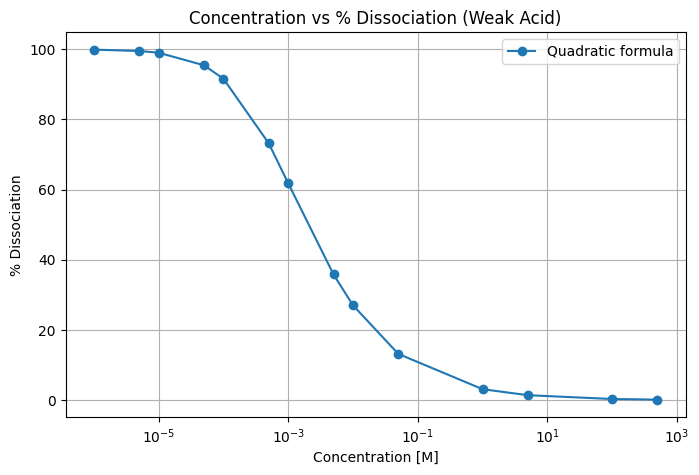

In [8]:
# Plotting
plt.figure(figsize=(8,5))
plt.plot(valid_concs, dissociation_quadratic, 'o-', label='Quadratic formula')
plt.xlabel("Concentration [M]")
plt.ylabel("% Dissociation")
plt.title("Concentration vs % Dissociation (Weak Acid)")
plt.xscale('log')                                                      # optional - semi-logarithmi scale
plt.grid(True)
plt.legend()
plt.show()